https://github.com/CSSEGISandData/COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_confirmed = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
sorted(df_confirmed['Country/Region'].unique())[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda']

In [4]:
euro = [
'Austria',
'Belarus',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Croatia',
'Cyprus',
'Czechia',
'Denmark',
'Estonia',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Ireland',
'Italy',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Malta',
'Monaco',
'Moldova',
'Netherlands',
'North Macedonia',
'Norway',
'Poland',
'Portugal',
'Romania',
'Serbia',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Ukraine',
'United Kingdom'
]

In [5]:
# sum daily data for a particular list of counties
def preprocess_sum(df, countries):
    df_country = df[df['Country/Region'].isin(countries)].drop(df.columns[0:4], axis=1)
    df_country = df_country.apply(lambda c: np.sum(c), axis=0) # returns a series
    dates, ts_data = list(map(lambda i: i[:-3], df_country.index)), list(df_country)
    return dates, ts_data

In [6]:
# get daily counts of new events (infections, recoveries, deaths)
def preprocess_daily_new(df, countries):
        df_country = df[df['Country/Region'].isin(countries)].drop(df.columns[0:4], axis=1)
        df_country = df_country.apply(lambda c: np.sum(c), axis=0).diff() # returns a series
        dates, ts_data = list(map(lambda i: i[:-3], df_country.index[1:])), list(df_country)[1:]
        return dates, ts_data 

### China
Time series of infections in China

In [7]:
dates, ts_infections_china = preprocess_sum(df_confirmed, ['China'])
_, ts_deaths_china = preprocess_sum(df_deaths, ['China'])
_, ts_recovered_china = preprocess_sum(df_recovered, ['China'])

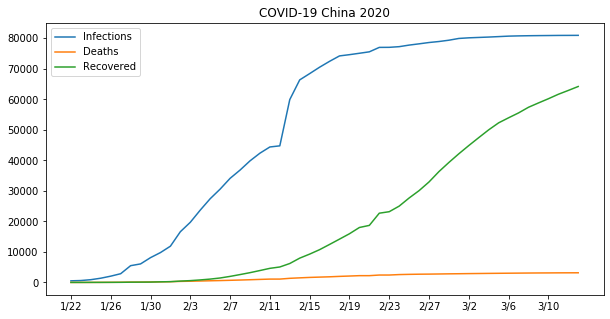

In [8]:
plt.figure(figsize=(10,5))
plt.plot(dates, ts_infections_china, label="Infections")
plt.plot(dates, ts_deaths_china, label="Deaths")
plt.plot(dates, ts_recovered_china, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 China 2020')
plt.show()

New infections, deaths, recovered

In [9]:
dates, daily_infections_china = preprocess_daily_new(df_confirmed, ['China'])
_, daily_deaths_china = preprocess_daily_new(df_deaths, ['China'])
_, daily_recovered_china = preprocess_daily_new(df_recovered, ['China'])

In [10]:
df_new_events_china =  pd.DataFrame([daily_infections_china, daily_deaths_china, daily_recovered_china], 
                                    columns=dates, index=['Infections', 'Deaths', 'Recovered'])
df_new_events_china.head()

,1/23,1/24,1/25,1/26,1/27,1/28,1/29,1/30,1/31,2/1,...,3/4,3/5,3/6,3/7,3/8,3/9,3/10,3/11,3/12,3/13
Infections,95.0,277.0,486.0,669.0,802.0,2632.0,578.0,2054.0,1661.0,2089.0,...,125.0,151.0,153.0,80.0,53.0,37.0,27.0,34.0,11.0,13.0
Deaths,1.0,8.0,16.0,14.0,26.0,49.0,2.0,38.0,42.0,46.0,...,36.0,32.0,29.0,28.0,28.0,23.0,16.0,22.0,11.0,8.0
Recovered,2.0,6.0,3.0,10.0,9.0,43.0,19.0,15.0,79.0,61.0,...,2551.0,2291.0,1652.0,1595.0,1849.0,1416.0,1377.0,1463.0,1257.0,1295.0


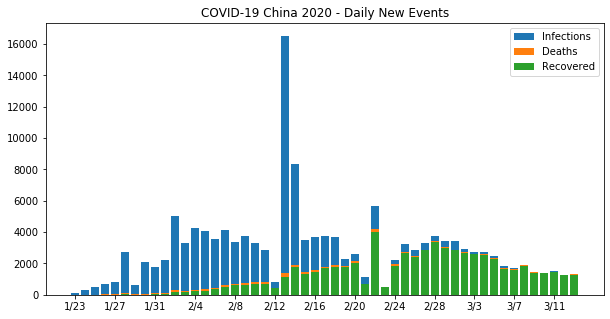

In [11]:
plt.figure(figsize=(10,5))
plt.bar(dates, daily_infections_china, label="Infections", 
        bottom=np.array(daily_deaths_china+np.array(daily_recovered_china)))
plt.bar(dates, daily_deaths_china, label="Deaths", bottom=daily_recovered_china)
plt.bar(dates, daily_recovered_china, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 China 2020 - Daily New Events')
plt.show()

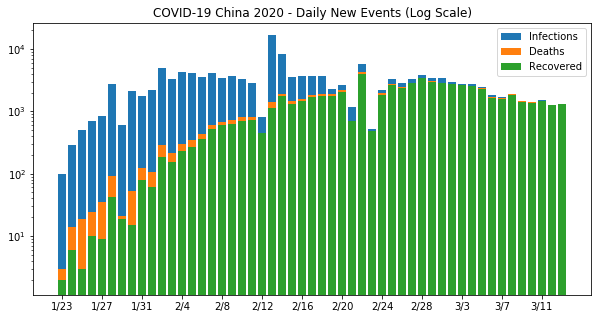

In [12]:
plt.figure(figsize=(10,5))
plt.bar(dates, daily_infections_china, label="Infections", 
        bottom=np.array(daily_deaths_china+np.array(daily_recovered_china)), log=True)
plt.bar(dates, daily_deaths_china, label="Deaths", bottom=daily_recovered_china, log=True)
plt.bar(dates, daily_recovered_china, label="Recovered", log=True)
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 China 2020 - Daily New Events (Log Scale)')
plt.show()

### Europe
Time series of infections in Europe

In [13]:
df_euro = df_confirmed[df_confirmed['Country/Region'].isin(euro)].drop(df_confirmed.columns[0:4], axis=1)
df_euro = df_euro.apply(lambda c: np.sum(c), axis=0) # returns a series
ts_infections_euro = list(df_euro)

In [14]:
dates, ts_infections_euro = preprocess_sum(df_confirmed, euro)
dates, ts_deaths_euro = preprocess_sum(df_deaths, euro)
dates, ts_recovered_euro = preprocess_sum(df_recovered, euro)

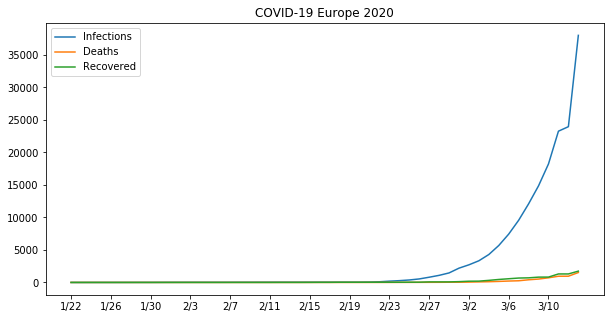

In [16]:
plt.figure(figsize=(10,5))
plt.plot(dates, ts_infections_euro, label="Infections")
plt.plot(dates, ts_deaths_euro, label="Deaths")
plt.plot(dates, ts_recovered_euro, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 Europe 2020')
plt.show()

New infections, deaths, recovered

In [17]:
dates, daily_infections_euro = preprocess_daily_new(df_confirmed, euro)
_, daily_deaths_euro = preprocess_daily_new(df_deaths, euro)
_, daily_recovered_euro = preprocess_daily_new(df_recovered, euro)

In [18]:
df_new_events_euro =  pd.DataFrame([daily_infections_euro, daily_deaths_euro, daily_recovered_euro], 
                                    columns=dates, index=['Infections', 'Deaths', 'Recovered'])
df_new_events_euro.head()

,1/23,1/24,1/25,1/26,1/27,1/28,1/29,1/30,1/31,2/1,...,3/4,3/5,3/6,3/7,3/8,3/9,3/10,3/11,3/12,3/13
Infections,0.0,2.0,1.0,0.0,1.0,4.0,2.0,0.0,6.0,5.0,...,961.0,1387.0,1756.0,2128.0,2527.0,2774.0,3369.0,5033.0,692.0,14049.0
Deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,46.0,56.0,43.0,152.0,111.0,193.0,242.0,3.0,566.0
Recovered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,118.0,138.0,111.0,107.0,33.0,109.0,6.0,483.0,0.0,432.0


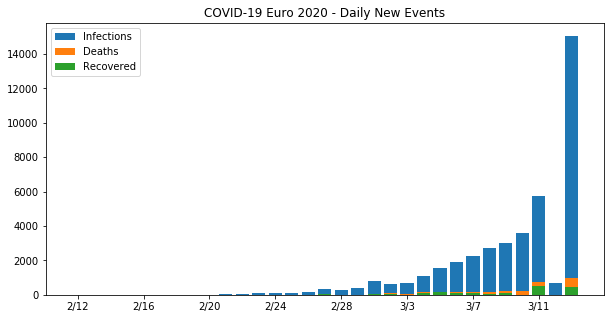

In [19]:
plt.figure(figsize=(10,5))
SKIP=20
plt.bar(dates[SKIP:], daily_infections_euro[SKIP:], label="Infections", 
        bottom=np.array(daily_deaths_euro[SKIP:]+np.array(daily_recovered_euro[SKIP:])))
plt.bar(dates[SKIP:], daily_deaths_euro[SKIP:], label="Deaths", bottom=daily_recovered_euro[SKIP:])
plt.bar(dates[SKIP:], daily_recovered_euro[SKIP:], label="Recovered")
plt.xticks(range(0, len(dates[SKIP:]), 4))
plt.legend()
plt.title('COVID-19 Euro 2020 - Daily New Events')
plt.show()